# Credit Card Fraud Detection

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('creditcard.csv')

# Data Processing

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
labels = 'Not Fraud', 'Fraud'

sizes  = [data.Class[data['Class']==0].count(),data.Class[data['Class']==1].count()]

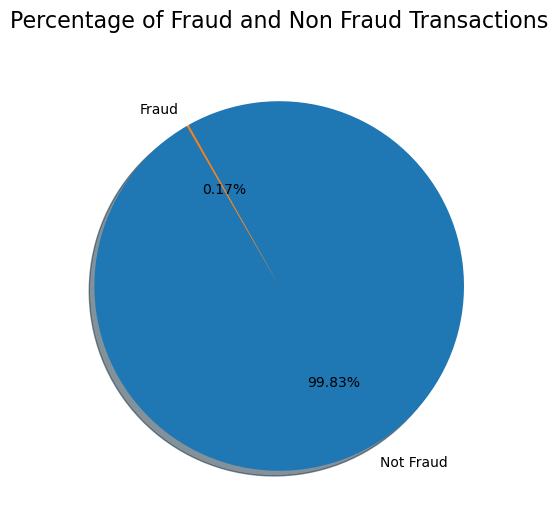

In [10]:
fig1, ax1 = plt.subplots(figsize = (10,6))

ax1.pie(sizes,labels = labels , autopct = '%1.2f%%', shadow= True, startangle = 120)

title = 'Percentage of Fraud and Non Fraud Transactions'
plt.title(title, size=16,pad=20)
plt.show()

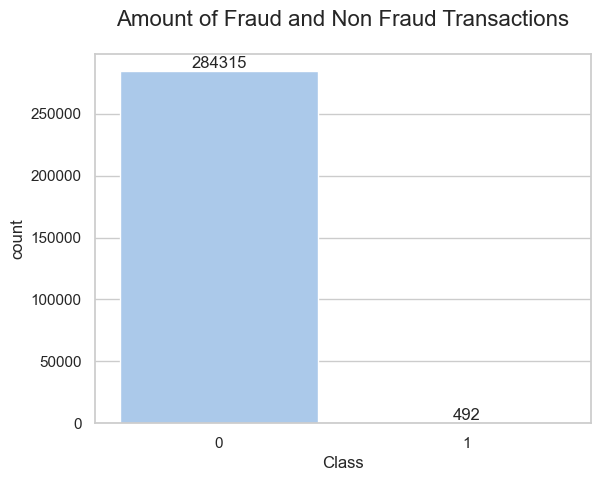

In [12]:
sns.set(style = 'whitegrid')

ax = sns.countplot(x = 'Class', data = data, order = [0,1],label = 'Count', palette = 'pastel')

counts = data['Class'].value_counts()

for i, count in enumerate(counts):{
    ax.text(i,count,str(count),ha='center',va='bottom',fontsize=12)
}

title = 'Amount of Fraud and Non Fraud Transactions'
ax.set_title(title,size=16)
plt.title(title,size=16,pad=20)

plt.show()

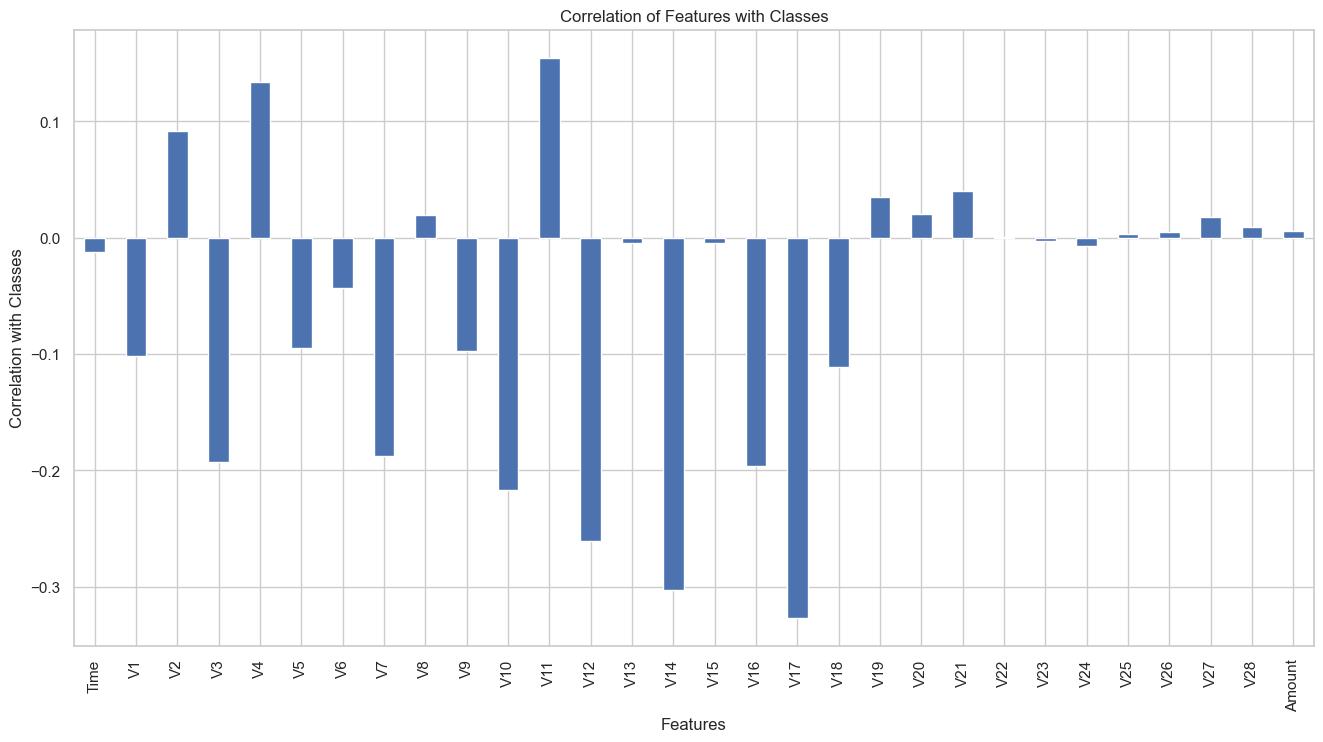

In [16]:
data_2 = data.drop(columns = ['Class'])

correlation_with_class= data_2.corrwith(data['Class'])

correlation_with_class.plot.bar(figsize= (16,8),grid = True)

plt.xlabel('Features')

plt.ylabel('Correlation with Classes')

plt.title('Correlation of Features with Classes')

plt.show()


In [17]:
corr  = data.corr()

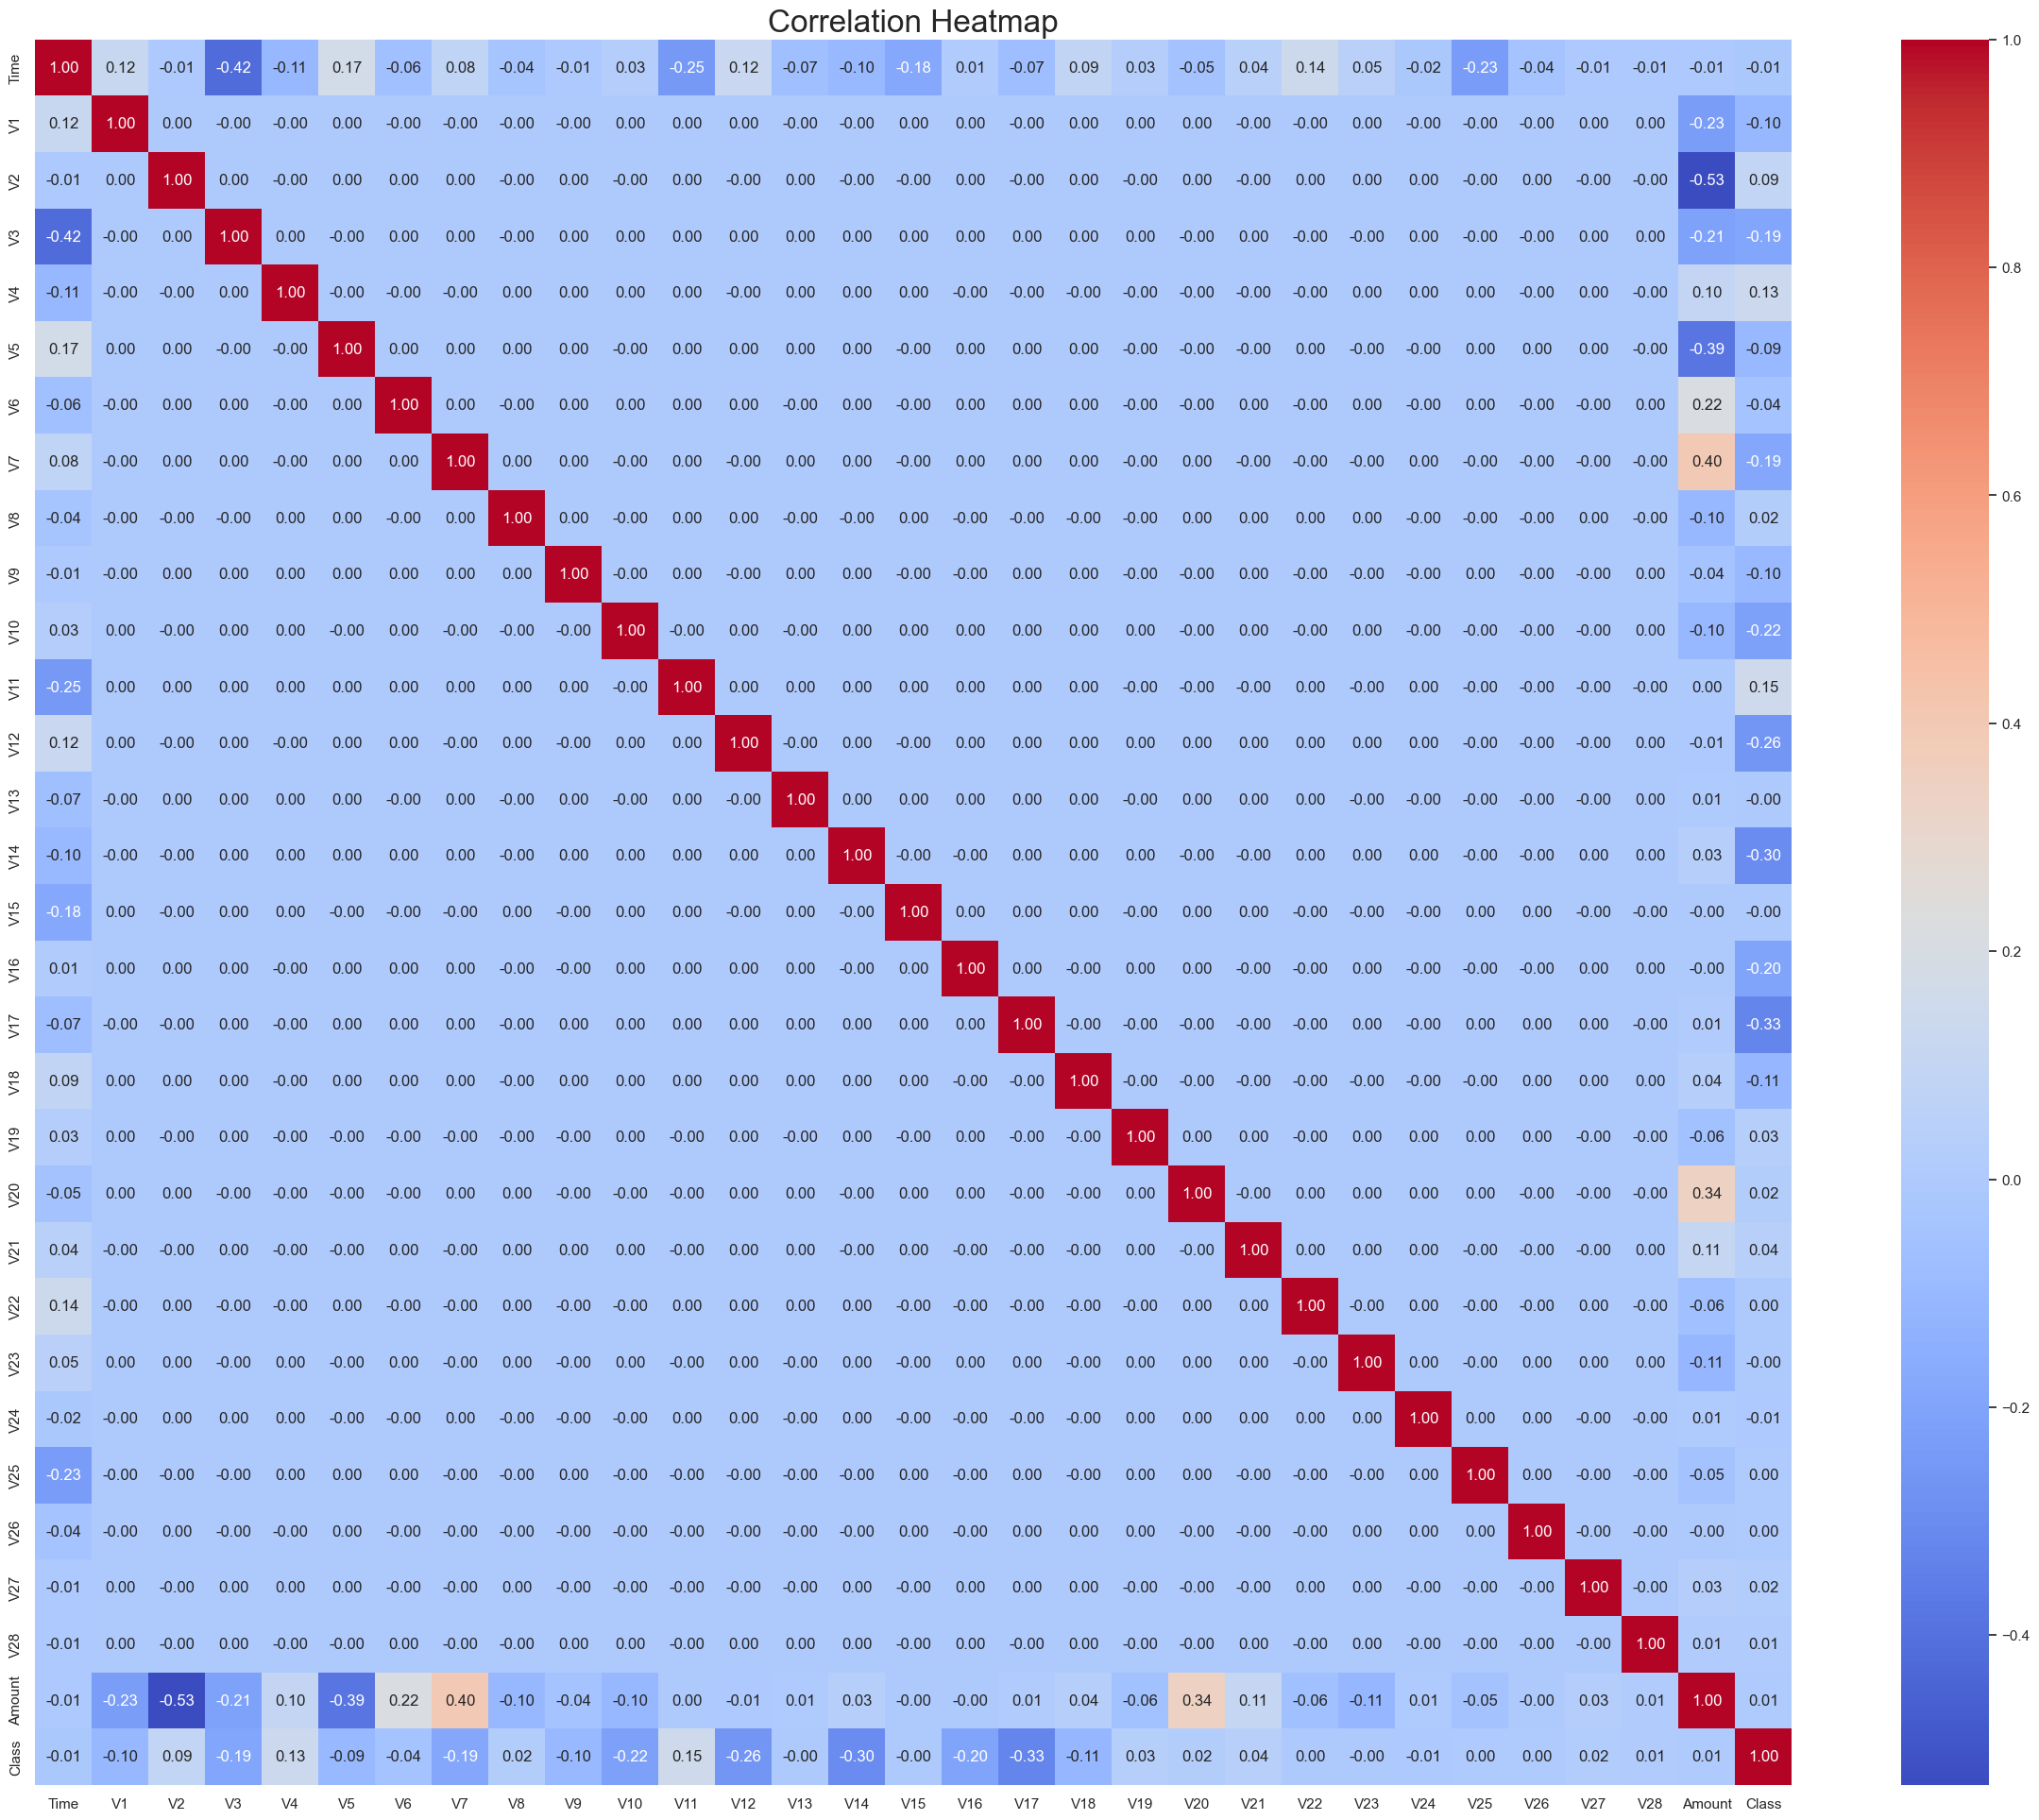

In [18]:
plt.figure(figsize= (30,24))

sns.heatmap(corr,annot = True, cmap = 'coolwarm', fmt= '.2f')

plt.title('Correlation Heatmap', fontsize = 24)

plt.show()

In [19]:
x = data.drop(columns = ['Class'])
y = data['Class']

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression 

In [26]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = lreg.predict(x_test)

In [28]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score, recall_score

In [31]:
acc = accuracy_score(y_test,y_pred)

f1 = f1_score(y_test,y_pred)

precision = precision_score(y_test,y_pred)

recall = recall_score(y_test,y_pred)

In [34]:
product = pd.DataFrame([['LogisticRegression',acc,f1,precision,recall]],columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall_score'])


product

,Model,Accuracy,F1_score,Precision,Recall_score
0,LogisticRegression,0.999204,0.728,0.883495,0.619048


In [35]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[85284    12]
 [   56    91]]
